<img src="https://image.aladin.co.kr/product/16902/16/cover500/k202534274_1.jpg" width="200" height="200"><br>

# Chapter 12 시계열 데이터 

시계열 데이터는 데이터 분석 분야에서 중요하게 다루는 데이터 중 하나이다. 우리가 지금까지 다룬 날씨 관측 데이터, 에볼라 전염병으로 인한 사망자 수 관측 데이터, 빌보드 차트 데이터에는 모두 시계열 데이터가 포함되어 있다. 즉, 일정 시간 간격으로 어떤 값을 기록한 데이터에서는 시계열 데이터가 매우 중요하다. 이번에는 시계열 데이터를 다뤄보고 Doit pandas 를 마무리 지어보자. 목차는 다음과 같다. 

 - 12-1 datetime 오브젝트
 - 12-2 사례별 시계열 데이터 계산하기
 
## Chapter 12-1 datetime 오브젝트

datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리다. datetime 라이브러리에는 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함되어 있다. 앞으로 3개의 오브젝트를 명확이 구분하기 위해 date, time, datetime 오브젝트라고 하겠다.

### datetime 오브젝트 사용하기

#### 1. 
datetime 오브젝트를 사용하기 위해 datetime 라이브러리를 불러오자 

In [11]:
from datetime import datetime

#### 2. 

now, today 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있다.

In [12]:
now1 = datetime.now()

print(now1)

now2 = datetime.today()

print(now2)

2021-03-28 20:14:11.379266
2021-03-28 20:14:11.379349


#### 3. 
다음은 datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달한 것이다. 각 변수를 출력하여 확인해 보면 입력한 시간을 바탕으로 datetime 오브젝트가 생성된 것을 알 수 있다. 

In [13]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2021-03-28 20:16:53.266507
1970-01-01 00:00:00
1970-12-12 13:24:34


#### 4. 
datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점이다. 다음은 두 datetime 오브젝트의 차이를 구한 것이다.

In [14]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

diff2 = t2 - t1

print(diff2)
print(type(diff2))

18714 days, 20:16:53.266507
<class 'datetime.timedelta'>
-18715 days, 3:43:06.733493
<class 'datetime.timedelta'>


### datetime 오브젝트로 변환하기 - to_datetime 메서드

경우에 따라서는 시계열 데이터를 문자열로 저장해야 할 때도 있다. 하지만 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변화해 주어야 한다. 이번에는 to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환하는 방법에 대해 알아보자. 

#### 1. 
먼저 ebola 데이터 집합을 불러오자. 

In [15]:
import pandas as pd
import os

ebola = pd.read_csv("data/country_timeseries.csv")

#### 2. 
ebola 데이터프레임을 보면 문자열로 저장된 Date 열이 있는 것을 알 수 있다.

In [16]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

#### 3. 
to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있다. 다음과 같이 to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가 한다.

In [19]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### 4. 
to_datetime 메서드를 좀 더 자세이 살펴보자. 시간 형식 지정자(%d, %m, %y)와 기호(/,-)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 datetime 오브젝트를 얻을 수 있다. 다음 실습을 참고하여 format 인자의 사용법을 확인하자.

In [23]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_df1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['date_df2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y')
test_df1['date_df3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d')

print(test_df1)

test_df2 = pd.DataFrame({'order_day': ['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_df'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')

print(test_df2)

  order_day   date_df1   date_df2   date_df3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15
  order_day    date_df
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


### datetime 오브젝트로 변환하기 - read_csv 메서드 

앞에서는 to_datetime 메서드를 사용하여 문자열로 저장되어 있는 Date 열을 datetime 오브젝트로 변환했습니다. 하지만 datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단하다. 다음 실습을 통해 알아보자.

### datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기 

#### 1. 
다음은 read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것이다. 결과를 보면 Date 열이 문자열이 아니라 datetime 오브젝트라는 것을 확인할 수 있다.

In [24]:
ebola1 = pd.read_csv("data/country_timeseries.csv", parse_dates=['Date'])

print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### datetime 오브젝트에서 날짜 정보 추출하기

datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보를 따로 저장하고 있는 속성이 이미 준비되어 있다. 다음 실습을 통해 datetime  오브젝트에서 날짜 정보를 하나씩 추출해보자. 

#### 1. 
다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것이다. 

In [25]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)

print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


#### 2. 
datetime 오브젝트의 year, month, day 속성을 이용하면 년, 월, 일 정보를 바로 추출할 수 있다. 

In [26]:
print(d1[0].year)

print(d1[0].month)

print(d1[0].day)

2018
5
16


### dt 접근자 사용하기

문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 한다. datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다. 

#### 1. 
먼저 ebola 데이터 집합을 불러온 다음 Date 열을 datetime 오브젝트로 변환하여 새로운 열로 추가 하자.

In [27]:
ebola = pd.read_csv("data/country_timeseries.csv")
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

#### 2. 
다음은 dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출한 것이다.

In [28]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


#### 3. 
과정 2와 같은 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편하다. 다음은 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값을 추출한 것이다. 추출한 연도값은 ebola 데이터프레임의 새로운 열로 추가 된다. 

In [30]:
ebola['year'] = ebola['date_dt'].dt.year

print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


#### 4. 
다음은 과정 3을 응용하여 월, 일 데이터를 한 번에 추출해서 새로운 열로 추가 한 것이다. 

In [32]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


#### 5. 
다음은 ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 열의 자료형을 출력한 것이다. date_dt 열은 datetime 오브젝트이고 나머지는 정수형이라는것을 알수 있다. 

In [33]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 12-2 사례별 시계열 데이터 계산

### 에볼라 최초 발병일 계산

#### 1. 
ebola 데이터프레임의 마지막 행과 열을 5개씩만 살펴보자. ebola 데이터프레임은 데이터가 시간 역순으로 정렬되어 있다. 즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴보아야 한다.

In [36]:
ebola.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


#### 2. 
121행에서 볼 수 있뜻이 에볼라가 발생하기 시작한 날은 2014년 3월 22일이다. 다음은 min 메서드를 사용해 에볼라의 최초 발병일을 찾은 것이다. 

In [37]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 3. 
에볼라의 최초 발병일을 알아냈으니 Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다.

In [39]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

ebola[['Date', 'Day', 'outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


### 파산한 은행의 개수 계산

이번에는 파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산해보자. 추가로 시각화도 진행해보자. 

#### 1. 

다음은 파산한 은행 데이터 집합을 불러온 것이다. banks 데이터프레임의 앞부분을 살펴보면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터라는 것을 알 수 있다.

In [40]:
banks = pd.read_csv("data/banklist.csv")

banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


#### 2. 
Closing Date, Updated Date 열의 데이터 자료형은 분자열이다. 다음은 read_csv 메서드의 parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러온 것이다. 

In [42]:
banks_no_dates = pd.read_csv("data/banklist.csv")

print(banks_no_dates.info())

banks = pd.read_csv("data/banklist.csv", parse_dates = [5,6])

print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null 

#### 3. 
dt 접근자와 quater 속성을 이용하면 은생이 파산한 분기를 알 수 있다. 다음은 dt 접근자와 year, quater 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것이다. 

In [46]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


#### 4. 
이제 연도별로 파산한 은행이 얼마나 되는지 알아보자. groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있다. 

In [48]:
closing_year = banks.groupby(['closing_year']).size()

closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

#### 5. 
각 연도별, 분기별로 파산한 은생의 개수도 알아보자. 다음은 banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력한 것이다. 

In [49]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()

closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

#### 6. 
다음은 과정 5에서 얻은 값으로 그래프를 그린 것이다. 

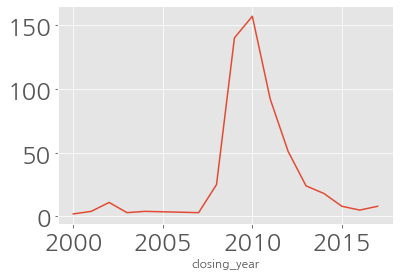

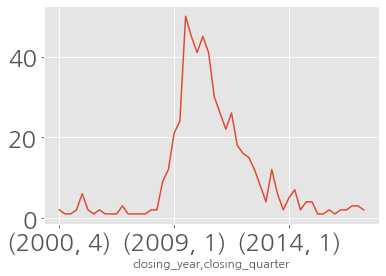

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closing_year.plot()

plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

### 시간 범위 수정하고 데이터 밀어내기 - shift 메서드

ebola의 확산 속도를 비교하는 방법을 알아보자. 

#### 1. 
다음은 ebola 데이터프레임의 Date 열을 인덱스로 지정한 다음 x축을 Date 열로, y축을 사망자 수로 지정하여 그린 그래프이다.

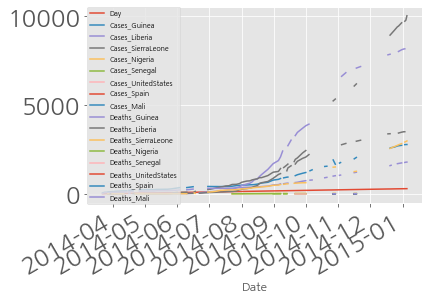

In [59]:
import matplotlib.pyplot as plt

ebola = pd.read_csv("data/country_timeseries.csv", parse_dates=[0])
ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize = 7, loc=2, borderaxespad=0.)
plt.show()

#### 1. 
다음은 get_data_quanal 메서드에 TSLA라는 문자열을 전달하여 테슬라의 주식 데이터를 내려받은 다음 to_csv 메서드를 사요하여 data 폴더안에 'tesla_stock_quandl.csv'라는 이름으로 저장한 것이다. 

In [53]:
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as pdr

# tesla에는 데이터프레임이 저장된다. 
tesla = pdr.get_data_quandl('TSLA', api_kwy)

#### 2. 
과정 1의 그래프는 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점도 다르다. 달리기 속도를 비교하려면 같은 출발선에서 출발하여 시간을 측정해야 한다. 에볼라의 확산 속도도 같은 방법으로 측정해야 한다. 즉, 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산속도를 제대로 비교할 수 있다. 

In [60]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


#### 3. 그래프를 그리기 위한 데이터프레임 준비하기

다음은 Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생선한 것이다. 글너데 중간에 아예 날짜가 없는 데이터도 있다. 이 데이터도 포함시켜야 확산 속도를 제대로 비교할 수 있다.

In [61]:
ebola = pd.read_csv("data/country_timeseries.csv", parse_dates=['Date'])

print(ebola.head().iloc[:,:5])

print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


#### 4. 
다음은 Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최대값과 최소값으로 시간 범위를 생성하여 new_idx에 저장한 것이다. 이렇게 하면 날짜가 아예 없었떤 데이터의 인덱스를 생성할 수 있다.

In [62]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

#### 5. 
그런데 new_idx를 살펴보면 ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어 있다. 다음은 시간 순서를 맞추기 위해 reversed 메서드를 사용하여 인덱스를 반대로 뒤집은 것이다. 

In [64]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


#### 6. 
다음은 reindex 메서드를 이용하여 새로 생성한 인덱스를 새로운 인덱스로 지정한 것이다. 그러면 2015년 01월 01일 데이터와 같은 ebola 데이터프레임에 아예 없었던 날짜가 추가된다. 이제 그래프를 그리기 위한 데이터프레임이 준비 되었다.

In [65]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:, :5])

print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
2015-01-01        NaT    NaN           NaN            NaN                NaN
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0


#### 7. 각 나라의 에볼라 방별일 옮기기 

다음은 last_valid_index, first_valid_index 메서드를 사용하여 각 나라의 에볼라 발병일을 구한 것이다. 각각의 메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환한다. 다음을 입력하고 결과를 확인해보자.

In [67]:
last_valid = ebola.apply(pd.Series.last_valid_index)

print(last_valid)

first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]
Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia       

#### 8. 
각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날에서 각 나라의 에볼라 발병일을 뺀 만큼만 옮기면 된다. 

In [68]:
earliest_date = ebola.index.min()
print(earliest_date)

shift_values = last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                  289 days
Day                   289 days
Cases_Guinea          289 days
Cases_Liberia         287 days
Cases_SierraLeone     289 days
Cases_Nigeria         260 days
Cases_Senegal         260 days
Cases_UnitedStates    260 days
Cases_Spain           260 days
Cases_Mali            260 days
Deaths_Guinea         289 days
Deaths_Liberia        287 days
Deaths_SierraLeone    289 days
Deaths_Nigeria        260 days
Deaths_Senegal        260 days
Deaths_UnitedStates   260 days
Deaths_Spain          260 days
Deaths_Mali           260 days
dtype: timedelta64[ns]


#### 9. 
이제 각 나라의 에볼라 발병일을 옮기자. 다음은 shift 메서드를 사용하여 모든 열의 값을 shift_values 값만큼 옮긴 것이다. shift 메서드는 인자값 만큼 데이터를 밀어내는 메서드이다.

In [69]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

#### 10. 
ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있다. 다음은 DataFrame 메서드를 사용하여 ebola_dict의 값을 데이터프레임으로 변환한 것이다. 이제 에볼라의 최초 발병일을 기준으로 모든 열의 데이터가 옮겨진것을 확인할 수 있다. 

In [72]:
ebola_shift = pd.DataFrame(ebola_dict)

print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
2015-01-01        NaT  NaN           NaN            NaN                NaN   
2015-01-02        NaT  NaN           NaN            NaN                NaN   
2015-01-03        NaT  NaN           NaN            NaN                NaN   
2015-01-04        NaT  NaN           NaN            NaN                NaN   
2015-01-05 2014-03-22  0.0          49.0            NaN                NaN   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
2015-01-01            NaN            NaN                 NaN          NaN   
2015-01-02            NaN            NaN                 NaN          NaN   
2015-01-03            NaN            NaN                 NaN          NaN   
2015-01-04            NaN            NaN                 NaN          NaN   
2015-01-05            NaN            NaN                 NaN          NaN   

            Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_Sierra

#### 11. 
마지막으로 인덱스를 DAy 열로 지정하고 그래프에 필요 없는 DAte, Day 열은 삭제하면 그래프를 그리기 위한 데이터프레임이 완성된다. 

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
NaN           NaN            NaN                NaN            NaN   
NaN           NaN            NaN                NaN            NaN   
NaN           NaN            NaN                NaN            NaN   
NaN           NaN            NaN                NaN            NaN   
0.0          49.0            NaN                NaN            NaN   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
NaN            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            NaN                 NaN          NaN         NaN   

     Deaths_Guinea  Deaths_Liberia  Dea

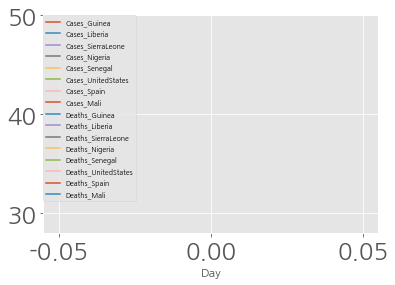

In [73]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize = 7, loc=2, borderaxespad = 0.)
plt.show()